# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Muhammad Mushab Umair
- **Email:** mmushab03@gmail.com
- **ID Dicoding:** mushab

## Menentukan Pertanyaan Bisnis

- Bagaiman tren penyewaan sepeda dalam 2 tahun terakhir?
- Bagaimana korelasi antara faktor-faktor lingkungan seperti cuaca, musim, dan temperatur dengan jumlah peminjaman sepeda secara harian dan per jam?
- Bagaimana segmentasi pelanggan peminjam sepeda berdasarkan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency

## Data Wrangling

### Gathering Data

In [101]:
hour_df = pd.read_csv('hour.csv', sep=';')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [102]:
day_df = pd.read_csv('day.csv', sep=';')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [103]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tahap ini dilakukan guna mengecek kesalahan dalam masing-masing variabel data. Berdasarkan kasus ini, dapat dilihat bahwa tipe data kolom dteday salah. Seharusnya kolom dteday menggunakan tipe data datetime yang nantinya akan diubah pada tahap cleaning data



In [104]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Code ini digunakan untuk mengecek nilai null pada dataset dan dapat dilihat bahwa tidak ada nilai null pada dataset

In [105]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Code ini digunakan untuk mengecek data dupilikat pada dataset dan dapat dilihat bahwa tidak ada data duplikat dalam dataset

In [106]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Code ini menjelaskan poin-poin statistika deskriptif untuk seluruh variabel dataset. Berdasarkan hasil diatas, seluruh variabel terlihat sudah aman dan tidak ada yang aneh

In [107]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


tipe data dteday harusnya datetime

In [108]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Code ini digunakan untuk mengecek nilai null pada dataset dan dapat dilihat bahwa tidak ada nilai null pada dataset

In [109]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Code ini digunakan untuk mengecek data dupilikat pada dataset dan dapat dilihat bahwa tidak ada data duplikat dalam dataset

In [110]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Code ini menjelaskan poin-poin statistika deskriptif untuk seluruh variabel dataset. Berdasarkan hasil diatas, seluruh variabel terlihat sudah aman dan tidak ada yang aneh

### Cleaning Data

In [111]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])
  day_df[column] = pd.to_datetime(day_df[column])

<ipython-input-111-344de5c402e9>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hour_df[column] = pd.to_datetime(hour_df[column])
<ipython-input-111-344de5c402e9>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  day_df[column] = pd.to_datetime(day_df[column])


Code ini digunakan untuk mengubah tipe data kedua dataset yang sebelumnya telah ditemukan kesalahannya pada tahap assessing data. Hasilnya adalah tipe data kolom dteday diubah menjadi datetime. Untuk mengeceknya lagi digunakan code berikut dibawah

In [112]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [113]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [114]:
hour_df.to_csv("hour_data.csv", index=False)

In [115]:
day_df.to_csv("day_data.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore Data hour_df

In [116]:
hour_df.describe(include="all")

<ipython-input-116-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [117]:
hour_df.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-12-09,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977
14964,14965,2012-09-20,3,1,9,17,0,4,1,1,0.64,0.6212,0.50,0.2239,91,885,976
14748,14749,2012-11-09,3,1,9,17,0,2,1,1,0.70,0.6364,0.28,0.0000,168,802,970
14725,14726,2012-10-09,3,1,9,18,0,1,1,1,0.62,0.6212,0.35,0.2985,111,857,968
15084,15085,2012-09-25,4,1,9,17,0,2,1,1,0.66,0.6212,0.39,0.2836,107,860,967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304,11305,2012-04-21,2,1,4,5,0,6,0,1,0.50,0.4848,0.82,0.2537,0,1,1
435,436,2011-01-20,1,0,1,4,0,4,1,1,0.26,0.2576,0.56,0.1642,0,1,1
434,435,2011-01-20,1,0,1,3,0,4,1,1,0.26,0.2576,0.56,0.1642,0,1,1
1041,1042,2011-02-16,1,0,2,3,0,3,1,2,0.20,0.1970,0.47,0.1940,0,1,1


Code tersebut bertujuan untuk melihat data dengan jumlah penyewaan terbanyak. Dari hasilnya, dapat dilihat bahwa peminjaman terbanyak jatuh pada 9 desember 2012, tepatnya pada jam 18 hari rabu (kerja) musim gugur dengan cuaca Clear, Few clouds, Partly cloudy, Partly cloudy. Selain itu, data 5 terbanyak merupakan penyewaan yang terjadi pada jam-jam sore. Berkebalikan dengan hal itu, jam penyewaan paling sedikit terjadi di jam pagi dini hari.

In [118]:
# Mengelompokkan data berdasarkan jam dan menghitung beberapa statistik tentang jumlah pelanggan sepeda
hour_df_grouped = hour_df.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean", "std", "sum"]  # Menambahkan "sum" untuk mendapatkan total
})

# Urutkan hasil berdasarkan jumlah maksimum pelanggan secara descending
hour_df_grouped_sorted = hour_df_grouped.sort_values(by=("cnt", "sum"), ascending=False)

print(hour_df_grouped_sorted)

    cnt                                    
    max min        mean         std     sum
hr                                         
17  976  15  461.452055  232.656611  336860
18  977  23  425.510989  224.639304  309772
8   839   5  359.011004  235.189285  261001
16  783  11  311.983562  148.682618  227748
19  743  11  311.523352  161.050359  226789
13  760  11  253.661180  148.107657  184919
12  776   3  253.315934  145.081134  184414
15  750   7  251.233196  144.632541  183149
14  750  12  240.949246  147.271574  175652
20  567  11  226.030220  119.670164  164550
9   426  14  219.309491   93.703458  159438
7   596   1  212.064649  161.441936  154171
11  663  10  208.143054  127.495536  151320
10  539   8  173.668501  102.205413  126257
21  584   6  172.314560   89.788893  125445
22  502   9  131.335165   69.937782   95612
23  256   2   87.831044   50.846889   63941
6   213   1   76.044138   55.084348   55132
0   283   2   53.898072   42.307910   39130
1   168   1   33.375691   33.538

Code ini melihat jumlah penyewaann sepeda lebih detail untuk setiap jam nya. Dapat dilihat peak data peminjaman terjadi pada jam 17, sesuai dengan code sebelum ini. Lalu, penyewaan paling sedikit terjadi pada jam pagi dini hari. Hal ini dapat disimpulkan bahwa penyewa menggunakan waktunya untuk meminjam sepeda pada sore hari dan ketika pagi dini hari masih belum banyak peminjaman. Selain itu, sore hari juga merupakan jam pulang kerja dimana banyak orang menggunakan sepeda entah untuk perjalanan pulang ataupun berolahraga.

In [119]:
# Mengelompokkan data berdasarkan jam dan hari kerja, dan menghitung jumlah penyewa sepeda
hour_df_grouped_workingday = hour_df[hour_df['workingday'] == 1].groupby(by=["hr"]).agg({"cnt": "sum"})
hour_df_grouped_non_workingday = hour_df[hour_df['workingday'] == 0].groupby(by=["hr"]).agg({"cnt": "sum"})

# Mengurutkan hasil secara descending berdasarkan jumlah penyewa sepeda per jam
hour_df_grouped_workingday_sorted = hour_df_grouped_workingday.sort_values(by="cnt", ascending=False)
hour_df_grouped_non_workingday_sorted = hour_df_grouped_non_workingday.sort_values(by="cnt", ascending=False)

# Menambahkan total penyewa sepeda di seluruh jam pada hari kerja dan tidak hari kerja
total_workingday = hour_df_grouped_workingday["cnt"].sum()
total_non_workingday = hour_df_grouped_non_workingday["cnt"].sum()

print("Jumlah penyewa per jam pada hari kerja (descending):")
print(hour_df_grouped_workingday_sorted)
print("\nTotal penyewa sepeda pada hari kerja:", total_workingday)

print("\nJumlah penyewa per jam pada hari tidak kerja (descending):")
print(hour_df_grouped_non_workingday_sorted)
print("\nTotal penyewa sepeda pada hari tidak kerja:", total_non_workingday)


Jumlah penyewa per jam pada hari kerja (descending):
       cnt
hr        
17  262120
18  245129
8   236595
19  173504
16  146268
7   144144
20  124360
9   119793
15  100263
12   99808
13   98818
21   92771
14   91419
11   78482
22   68918
10   67142
6    50840
23   44177
0    18246
5    12332
1     8177
2     4229
4     2552
3     2323

Total penyewa sepeda pada hari kerja: 2292410

Jumlah penyewa per jam pada hari tidak kerja (descending):
      cnt
hr       
13  86101
12  84606
14  84233
15  82886
16  81480
17  74740
11  72838
18  64643
10  59115
19  53285
20  40190
9   39645
21  32674
22  26694
8   24406
0   20884
23  19764
1   15987
2   12123
7   10027
3    5851
6    4292
5    1929
4    1876

Total penyewa sepeda pada hari tidak kerja: 1000269


Berdasarkan eksplorasi sebelumnya, penyewaan sepeda terjadi pada jam sore hari. Hal ini terbukti bahwa kebanyakan orang menggunakan peminjaman sepeda pada saat jam pulang kerja. Dari hasil data diatas dapat dilihat bahwa penyewaan sepeda pada hari kerja jauh lebih banyak daripada saat hari libur/akhir pekan. Hal ini membuktikan bahwa masyarakat jauh lebih banyak menggunakan sepeda ketika sedang beraktivitas sehari-hari daripada saat hari libur.

In [120]:
hour_df.groupby(["season", "weathersit"]).agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
})

cnt                                    
                   max min        mean         std     sum
season weathersit                                         
1      1           801   1  122.055535  127.384258  325278
       2           712   1  103.074689  106.154745  124205
       3           520   1   58.650407   74.793446   21642
       4           164  23   74.333333   77.925178     223
2      1           873   1  232.410983  198.312457  664463
       2           957   1  181.261364  164.832349  207363
       3           782   1  115.179803  130.760396   46763
3      1           977   1  244.494207  201.732720  801941
       2           868   2  224.848997  185.406665  212932
       3           891   1  171.955390  175.871513   46256
4      1           967   1  209.463779  190.891851  546491
       2           905   1  201.483974  173.833617  251452
       3           856   1  116.453333  127.471365   43670

Code diatas digunakan untuk melihat hubungan antara penyewaan sepeda berdasarkan musim dan juga cuaca. Dapat dilihat bahwa puncak peminjaman ada pada musim gugur saat cuaca Clear, Few clouds, Partly cloudy, Partly cloudy. Selain itu, peminjaman saat cuaca Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog sangat sedikit bahkan hanya ada pada musim semi. Lalu, jumlah peminjaman saat cuaca Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds juga cukup sedikit dibandingkan dengan cuaca cerah

In [121]:
# Menghitung korelasi antara variabel temp, atemp, hum, dan windspeed dengan jumlah penyewaan sepeda (cnt)
hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.404772,0.400929,-0.322911,0.093234,1.000000


Selain mencari tahu hubungan jumlah penyewa dengan musim & cuaca, kita juga harus tahu korelasinya dengan faktor-faktor cuaca seperti temperatur, kelembaban, dan kecepatan angin. Dapat dilihat dari hasilnya bahwa faktor temperatur berbanding lurus dengan jumlah penyewa. Hal ini berarti semakin naik dan stabil suhu suatu daerah maka semakin banyak juga penyewa sepeda per jamnya. Berkebalikan dengan kelembaban, semakin lembab suatu daerah maka semakin sedikit penyewa sepeda. Terakhir, faktor windspeed tidak terlalu berpengaruh terhadap penyewaan sepeda karena nilai korelasinya hanya 0.09

### Explore Data day_df

Eksplorasi pada dataset day dilakukan melalui step yang sama dengan dataset hour. Perbedaannya adalah kita ingin mengetahui faktor-faktor dalam bentuk harian.

In [122]:
day_df.describe(include="all")

<ipython-input-122-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [123]:
day_df.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-06-03,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431


Dari code diatas dapat dilihat bahwa peak day peminjaman ada pada 15 september 2012 pada musim gugur dengan cuaca Clear, Few clouds, Partly cloudy, Partly cloudy. Hal ini berbeda dengan dataset hour karena dataset day sudah diakumulasi dalam bentuk harian.

In [124]:
# Mengelompokkan data berdasarkan dateday dan hari kerja, dan menghitung jumlah penyewa sepeda
day_df_grouped_workingday = day_df[day_df['workingday'] == 1].groupby(by=["dteday"]).agg({"cnt": "sum"})
day_df_grouped_non_workingday = day_df[day_df['workingday'] == 0].groupby(by=["dteday"]).agg({"cnt": "sum"})

# Mengurutkan hasil secara descending berdasarkan jumlah penyewa sepeda per dateday
day_df_grouped_workingday_sorted = day_df_grouped_workingday.sort_values(by="cnt", ascending=False)
day_df_grouped_non_workingday_sorted = day_df_grouped_non_workingday.sort_values(by="cnt", ascending=False)

# Menambahkan total penyewa sepeda di seluruh dateday pada hari kerja dan tidak hari kerja
total_workingday = day_df_grouped_workingday["cnt"].sum()
total_non_workingday = day_df_grouped_non_workingday["cnt"].sum()

print("Jumlah penyewa per dateday pada hari kerja (descending):")
print(day_df_grouped_workingday_sorted)
print("\nTotal penyewa sepeda pada hari kerja:", total_workingday)

print("\nJumlah penyewa per dateday pada hari tidak kerja (descending):")
print(day_df_grouped_non_workingday_sorted)
print("\nTotal penyewa sepeda pada hari tidak kerja:", total_non_workingday)


Jumlah penyewa per dateday pada hari kerja (descending):
             cnt
dteday          
2012-03-23  8362
2012-07-25  8173
2012-09-21  8167
2012-05-10  8156
2012-09-14  8009
...          ...
2011-10-03   623
2011-01-26   506
2012-12-26   441
2011-01-27   431
2012-10-29    22

[500 rows x 1 columns]

Total penyewa sepeda pada hari kerja: 2292410

Jumlah penyewa per dateday pada hari tidak kerja (descending):
             cnt
dteday          
2012-09-15  8714
2012-09-29  8555
2012-09-22  8395
2012-05-19  8294
2012-09-09  8227
...          ...
2011-02-01   801
2011-04-16   795
2011-12-25   754
2011-10-29   627
2011-06-03   605

[231 rows x 1 columns]

Total penyewa sepeda pada hari tidak kerja: 1000269


Total data yang dihasilkan sama dengan code pada dataset hour. Hasil menunjukkan bahwa peak day peminjaman hari kerja pada tanggal 23 maret 2012 dan saat tidak kerja pada tanggal 15 september 2012.

In [125]:
day_df.groupby(["season", "weathersit"]).agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
})

cnt                                        
                    max   min         mean          std     sum
season weathersit                                              
1      1           6312   431  2811.135135  1409.960622  312036
       2           7836   605  2357.166667  1313.332082  155573
       3           2169   441   934.750000   826.272100    3739
2      1           8294  2028  5548.548673  1467.655078  626986
       2           8362  1471  4236.705882  1579.038070  288096
       3           1685   795  1169.000000   461.679543    3507
3      1           8714  3285  5878.257353  1356.647125  799443
       2           7582  1115  5222.479167  1431.160502  250679
       3           4459  1842  2751.750000  1199.339923   11007
4      1           8555  1495  5043.563107  1595.693909  519487
       2           7852  1096  4654.000000  1523.445365  302510
       3           4639    22  1961.600000  1329.287378   19616

Sama seperti eksplorasi dataset hour, code diatas digunakan untuk melihat hubungan antara penyewaan sepeda berdasarkan musim dan juga cuaca. Dapat dilihat bahwa puncak peminjaman ada pada musim gugur saat cuaca Clear, Few clouds, Partly cloudy, Partly cloudy. Selain itu, tidak terdapat peminjaman saat cuaca Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog karena datasetnya merecord dalam bentuk harian. Lalu, jumlah peminjaman saat cuaca Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds juga cukup sedikit dibandingkan dengan cuaca cerah

In [126]:
# Menghitung korelasi antara variabel temp, atemp, hum, dan windspeed dengan jumlah penyewaan sepeda (cnt)
day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


Selain mencari tahu hubungan jumlah penyewa dengan musim & cuaca, kita juga harus tahu korelasinya dengan faktor-faktor cuaca seperti temperatur, kelembaban, dan kecepatan angin. Dapat dilihat dari hasilnya bahwa faktor temperatur berbanding lurus dengan jumlah penyewa. Hal ini berarti semakin naik dan stabil suhu suatu daerah maka semakin banyak juga penyewa sepeda per jamnya. Berkebalikan dengan kelembaban dan windspeed, semakin lembab dan kencang anginnya, maka penyewaan sepeda semakin sedikit walaupun angka korelasinya hanya -0.2 & -0.1.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaiman tren penyewaan sepeda dalam 2 tahun terakhir?

In [127]:
monthly_sharing_df = day_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_sharing_df.index = monthly_sharing_df.index.strftime('%Y-%m')
monthly_sharing_df = monthly_sharing_df.reset_index()
monthly_sharing_df.rename(columns={
    "dteday": "Bulan",
    "cnt": "Total_Peminjaman"
}, inplace=True)
monthly_sharing_df

,Bulan,Total_Peminjaman
0,2011-01,61964
1,2011-02,71657
2,2011-03,84582
3,2011-04,107930
4,2011-05,125947
5,2011-06,125740
6,2011-07,121561
7,2011-08,121051
8,2011-09,121377
9,2011-10,114558


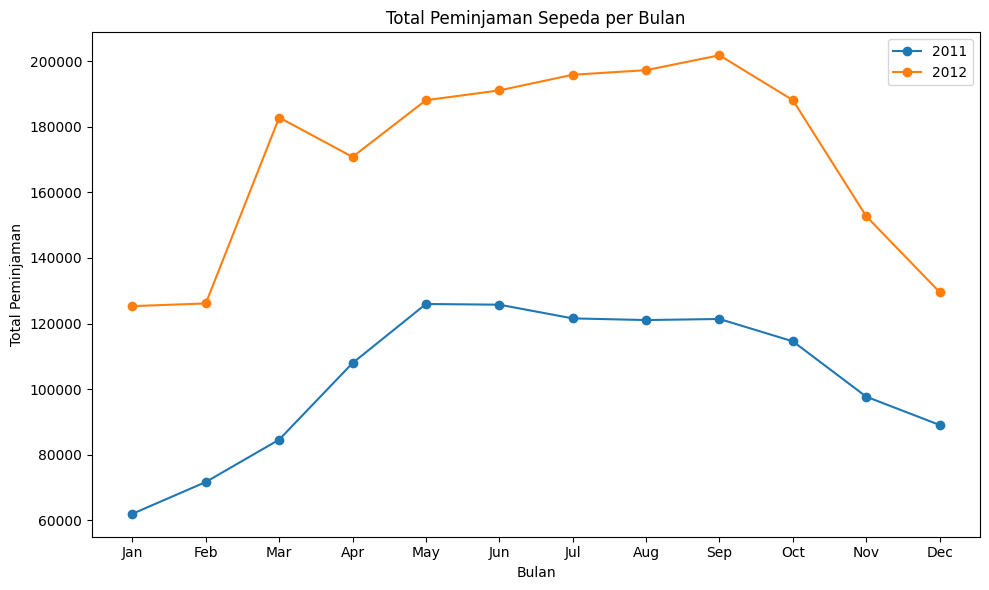

In [128]:
# Dataframe dari code yang diberikan
monthly_sharing_df = day_df.resample(rule='M', on='dteday').agg({"cnt": "sum"})
monthly_sharing_df.index = monthly_sharing_df.index.strftime('%Y-%m')
monthly_sharing_df = monthly_sharing_df.reset_index()
monthly_sharing_df.rename(columns={"dteday": "Bulan", "cnt": "Total_Peminjaman"}, inplace=True)

# Mengonversi kolom 'Bulan' menjadi tipe data datetime
monthly_sharing_df['Bulan'] = pd.to_datetime(monthly_sharing_df['Bulan'])

# Memisahkan data untuk tahun 2011 dan 2012
monthly_sharing_2011 = monthly_sharing_df[monthly_sharing_df['Bulan'].dt.year == 2011]
monthly_sharing_2012 = monthly_sharing_df[monthly_sharing_df['Bulan'].dt.year == 2012]

# Plotting
plt.figure(figsize=(10, 6))

# Plot untuk tahun 2011
plt.plot(monthly_sharing_2011['Bulan'].dt.month, monthly_sharing_2011['Total_Peminjaman'], 'o-', label='2011')

# Plot untuk tahun 2012
plt.plot(monthly_sharing_2012['Bulan'].dt.month, monthly_sharing_2012['Total_Peminjaman'], 'o-', label='2012')

# Konfigurasi plot
plt.title('Total Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Peminjaman')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan grafik yang dihasilkan diatas, dapat dilihat bahwa tren peminjaman sepeda pada tahun 2012 jauh lebih banyak dibandingkan dengan tahun 2011. Selain itu, pada tahun 2012, peak month peminjaman ada pada bulan September dan terjadi penurunan cukup signifikan pada bulan-bulan selanjutnya. Pada tahun 2011, dari awal tahun mengalami peningkatan sampai pada bulan Mei. Namun, bulan-bulan selanjutnya mengalami tren penrurunan sampai akhir tahun. Hal ini menunjukkan bahwa kenaikan penyewaan sepeda dari tahun ke tahun cukup berhasil walaupun di tahun tersebut mengalami naik turun yang signifikan.

### Pertanyaan 2: Bagaimana korelasi antara faktor-faktor lingkungan seperti cuaca, musim, dan temperatur dengan jumlah peminjaman sepeda secara harian dan per jam?

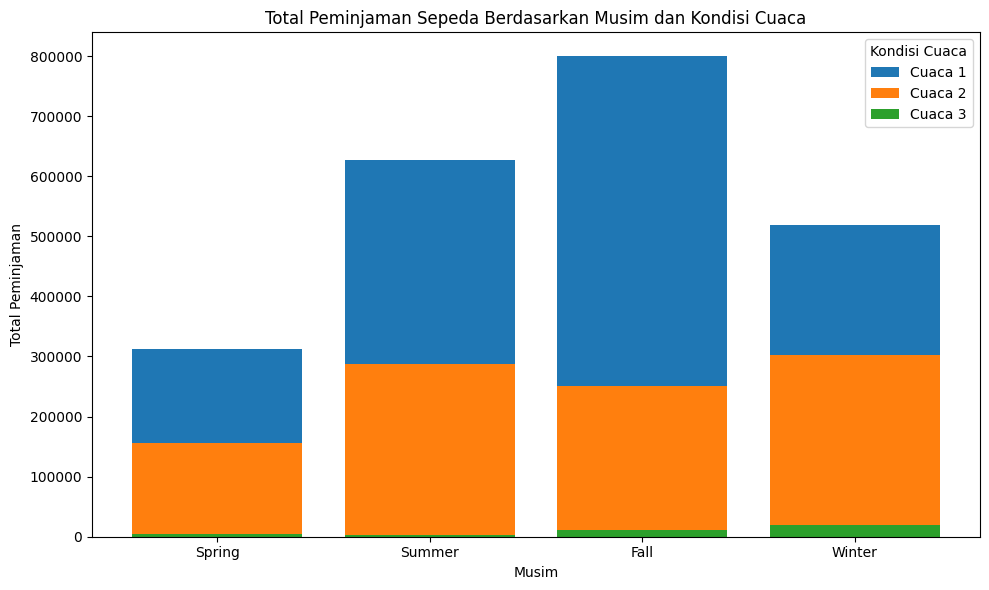

In [129]:
# Agregasi data
season_weather_stats = day_df.groupby(["season", "weathersit"]).agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
})

# Ubah multiindex menjadi single index untuk memudahkan visualisasi
season_weather_stats.columns = ['_'.join(col).strip() for col in season_weather_stats.columns.values]
season_weather_stats.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))

# Buat stacked bar plot
for weather_sit in season_weather_stats['weathersit'].unique():
    weather_sit_data = season_weather_stats[season_weather_stats['weathersit'] == weather_sit]
    plt.bar(weather_sit_data['season'], weather_sit_data['cnt_sum'], label=f'Cuaca {weather_sit}')

# Konfigurasi plot
plt.title('Total Peminjaman Sepeda Berdasarkan Musim dan Kondisi Cuaca')
plt.xlabel('Musim')
plt.ylabel('Total Peminjaman')
plt.legend(title='Kondisi Cuaca')
plt.xticks(range(1, 5), ['Spring', 'Summer', 'Fall', 'Winter'])

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, musim 3 atau musim gugur merupakan salah satu faktor meningkatnya penyewa sepeda. Selain itu, penyewaan tertinggi ketika cuaca sedang cerah sehingga memungkinkan banyak masyarakat menggunakan penyewaan sepeda. Berkebalikan dengan hal tersebut, di berbagai musim dapat dilihat bahwa ketika cuaca tidak mendukung, maka penyewaan sepeda juga ikut menurun. Bahkan, ketika cuaca 4 tidak terdapat penyewa sama sekali. Hal ini dapat disimpulkan bahwa musim dan cuaca pada hari tertentu berpengaruh terhadap tingkat penyewaan sepeda.

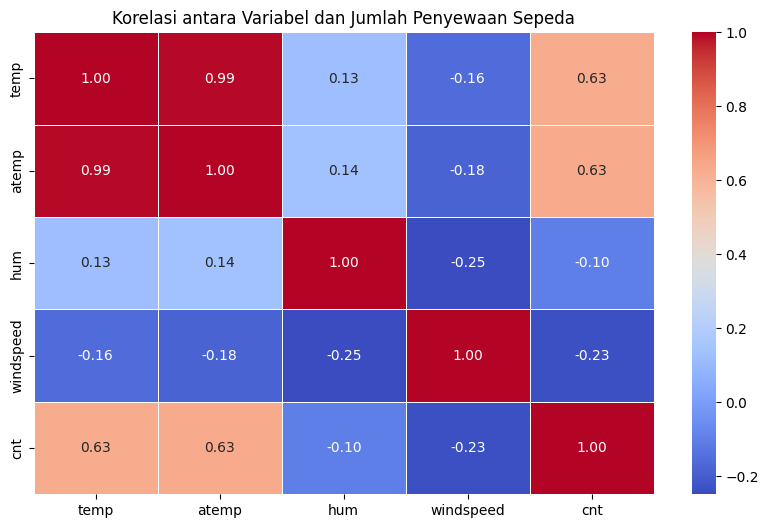

In [130]:
# Menghitung korelasi antara variabel temp, atemp, hum, windspeed, dan cnt
correlation_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelasi antara Variabel dan Jumlah Penyewaan Sepeda')
plt.show()

Berdasarkan heatmap korelasi diatas, dapat dilihat faktor terbesar peningkatan penyewa sepeda ada pada faktor temperatur/suhu. Walaupun angka korelasi hanya 0.63, tetapi dapat dinyatakan bahwa semakin hangat/stabil suhunya maka semakin meningkat penyewaan sepeda. Berkebalikan dengan faktor humidity/kelembaban dan windspeed. Hal ini dapat disimpulkan bahwa faktor-faktor cuaca dapat berpengaruh terhadap tingkat penyewaan sepeda.

### Pertanyaan 3: Bagaimana segmentasi pelanggan peminjam sepeda pada hari kerja, akhir pekan, dan hari libur?

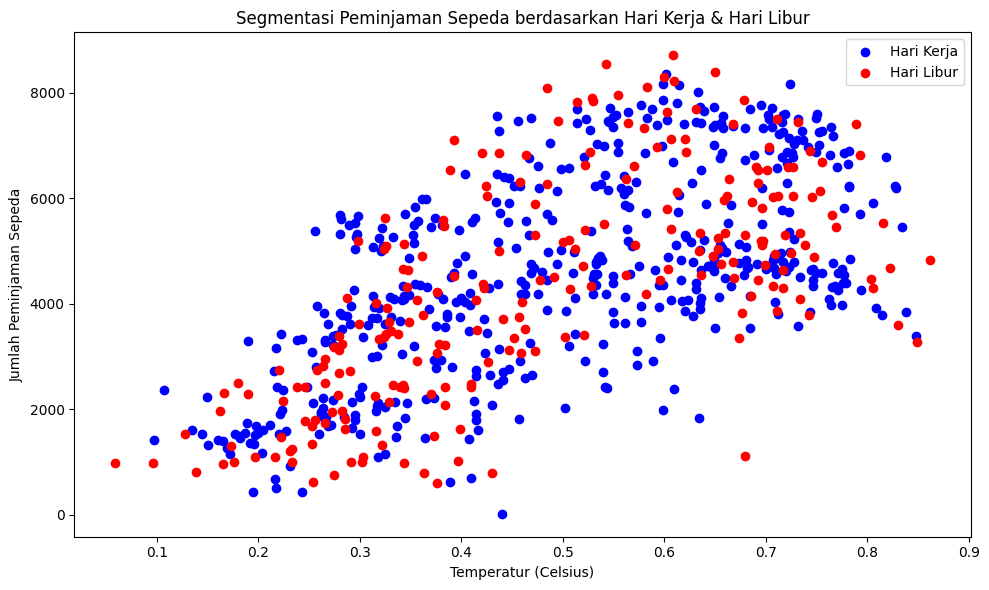

In [131]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot untuk hari kerja
plt.scatter(day_df[day_df['workingday'] == 1]['temp'],
            day_df[day_df['workingday'] == 1]['cnt'],
            color='blue',
            label='Hari Kerja')

# Scatter plot untuk hari libur
plt.scatter(day_df[day_df['workingday'] == 0]['temp'],
            day_df[day_df['workingday'] == 0]['cnt'],
            color='red',
            label='Hari Libur')

plt.xlabel('Temperatur (Celsius)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Segmentasi Peminjaman Sepeda berdasarkan Hari Kerja & Hari Libur')
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan grafik dapat dilihat bahwa persebaran penyewa sepeda pada hari kerja lebih banyak dibandingkan saat hari libur. Selain itu, ketika cuaca suhu normal (tidak terlalu panas/dingin), maka jumlah peminjaman juga semakin banyak. Hal ini dapat diartikan bahwa peminjaman sepeda dapat dibagi kedalam beberapa segmentasi, yaitu pelanggan yang bekerja, cuaca cerah, dan hari bekerja.

## Conclusion

- Tren penyewaan sepeda dalam 2 tahun terakhir mengalami kenaikan yang signifikan dari tahun 2011 ke tahun 2012. Hal ini dapat disimpulkan bahwa bisnis penyewaan sepeda mengalami kenaikan tahunan. Masyarakat sudah cukup mengetahui adanya penyewaan sepeda dan sudah banyak yang menggunakannya.
- Faktor musim dan cuaca berpengaruh terhadap tingkat penyewaan sepeda. Seperti yang diketahui, transportasi sepeda tidak seperti transportasi lainnya seperti mobil yang memiliki ruang dalamnya. Masyarakat cenderung menggunakan sepeda jika cuacanya cerah dan mendukung untuk berkegiatan di luar ruangan. Oleh karena itu, musim dan cuaca serta faktor lainnya (temperatur, kelembaban, dan kecepatan angin) sangat berpengaruh terhadap tingkat penyewaan sepeda
- Keadaan hari libur juga merupakan faktor dari tingkat penyewaan sepeda. Dari hasil eksplorasi dan visual diatas, dapat disimpulkan bahwa pelanggan terbagi menjadi beberapa segmentasi dimana terdapat pelanggan yang sering menggunakan penyewaan sepeda pada hari kerja, penyewaan sepeda pada hari libur, dan penyewaan sepeda berdasarkan temperatur (cuaca).